# Gradient Descent

This notebook is based on [notebook II](https://physics.bu.edu/~pankajm/ML-Notebooks/HTML/NB2_CIV-gradient_descent.html) of [A High-bias, low-variance introduction to Machine Learning for Physicists](https://physics.bu.edu/~pankajm/ML-Notebooks/MLnotebooks.html).

This notebook examines the differences in performance among various gradient descent algorithms applied to some common regression loss functions.

In [98]:
#Make plots interactive
%matplotlib widget

#Make 3D plots
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib import animation
from matplotlib.colors import LogNorm

from sklearn import datasets
diabetes = datasets.load_diabetes()

import numpy as np
rng = np.random.default_rng()

In [108]:
X = rng.uniform(0,1,(10000,2))
y = X @ np.array([3,2]) + 0.5*rng.standard_normal(10000)
y

array([4.5474838 , 0.63184732, 2.50553008, ..., 1.61029396, 3.23724209,
       3.16306639])

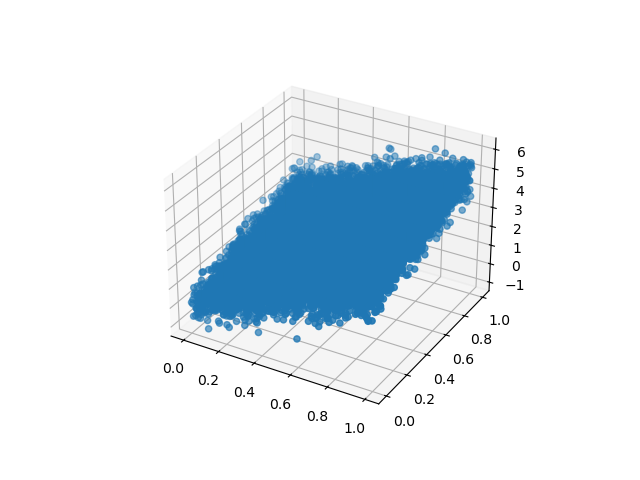

In [109]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:,0],X[:,1],y)
plt.show()

In [128]:
def L(w): 
    return np.linalg.norm(X @ w - y)^2

wx,wy = np.meshgrid(np.linspace(0,1,1000), np.linspace(0,1,1000))
w = np.vstack([wx.ravel(), wy.ravel()]).T
np.apply_along_axis(L,1,w)

TypeError: ufunc 'bitwise_xor' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

In [ ]:
#Import Numpy
import numpy as np

#Define function for plotting 

def plot_surface(x, y, z, azim=-60, elev=40, dist=10, cmap="RdYlBu_r"):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    plot_args = {'rstride': 1, 'cstride': 1, 'cmap':cmap,
             'linewidth': 20, 'antialiased': True,
             'vmin': -2, 'vmax': 2}
    ax.plot_surface(x, y, z, **plot_args)
    ax.view_init(azim=azim, elev=elev)
    ax.dist=dist
    ax.set_xlim(-1, 1)
    ax.set_ylim(-1, 1)
    ax.set_zlim(-2, 2)
    
    plt.xticks([-1, -0.5, 0, 0.5, 1], ["-1", "-1/2", "0", "1/2", "1"])
    plt.yticks([-1, -0.5, 0, 0.5, 1], ["-1", "-1/2", "0", "1/2", "1"])
    ax.set_zticks([-2, -1, 0, 1, 2])
    ax.set_zticklabels(["-2", "-1", "0", "1", "2"])
    
    ax.set_xlabel("x")
    ax.set_ylabel("y")
    ax.set_zlabel("z")
    return fig, ax;

def overlay_trajectory_quiver(ax,obj_func,trajectory, color='k'):
    xs=trajectory[:,0]
    ys=trajectory[:,1]
    zs=obj_func(xs,ys)
    ax.quiver(xs[:-1], ys[:-1], zs[:-1], xs[1:]-xs[:-1], ys[1:]-ys[:-1],zs[1:]-zs[:-1],color=color,arrow_length_ratio=0.3)
    
    return ax;

def overlay_trajectory(ax,obj_func,trajectory,label,color='k'):
    xs=trajectory[:,0]
    ys=trajectory[:,1]
    zs=obj_func(xs,ys)
    ax.plot(xs,ys,zs, color, label=label)
    
    return ax;

    
def overlay_trajectory_contour_M(ax,trajectory, label,color='k',lw=2):
    xs=trajectory[:,0]
    ys=trajectory[:,1]
    ax.plot(xs,ys, color, label=label,lw=lw)
    ax.plot(xs[-1],ys[-1],color+'>', markersize=14)
    return ax;

def overlay_trajectory_contour(ax,trajectory, label,color='k',lw=2):
    xs=trajectory[:,0]
    ys=trajectory[:,1]
    ax.plot(xs,ys, color, label=label,lw=lw)
    return ax;

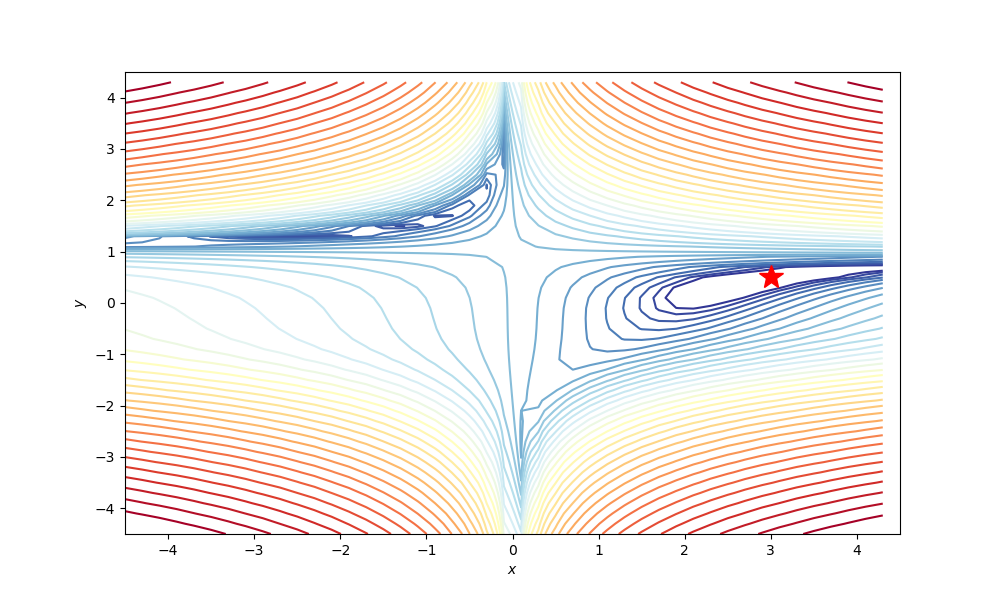

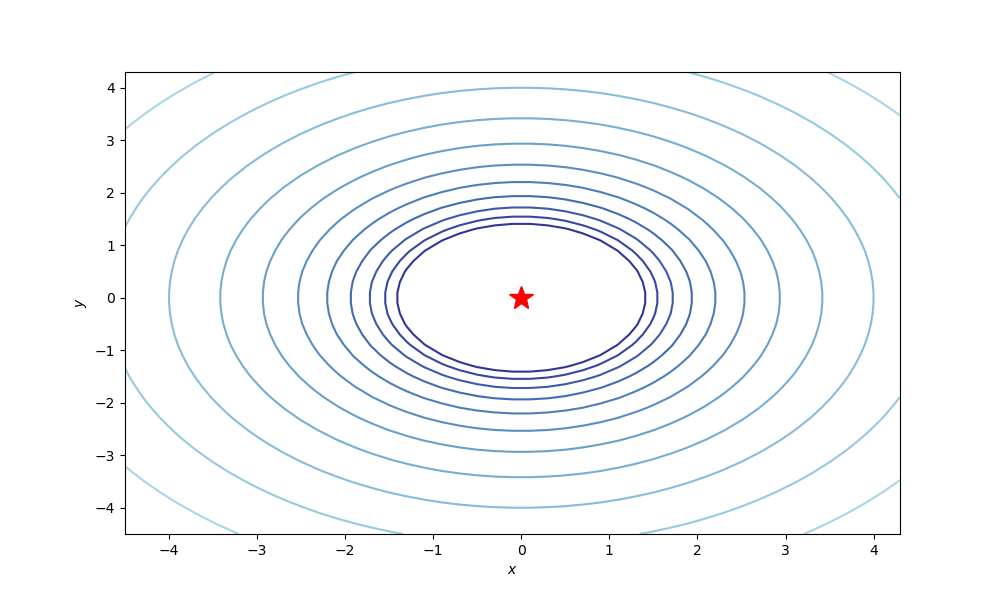

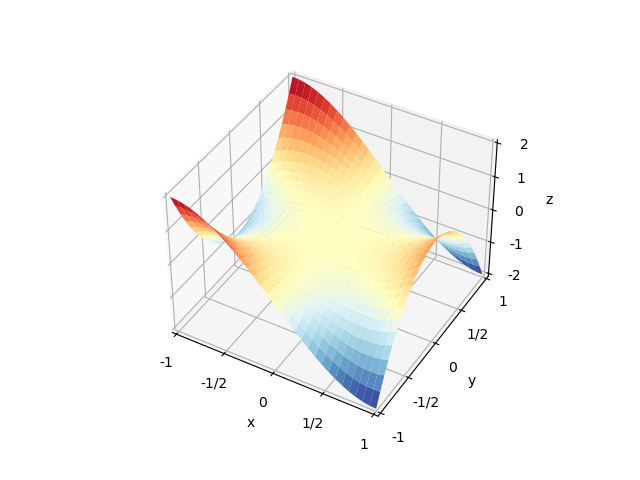

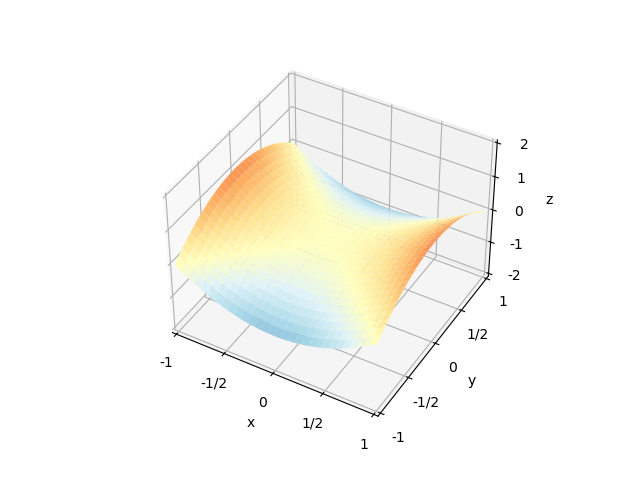

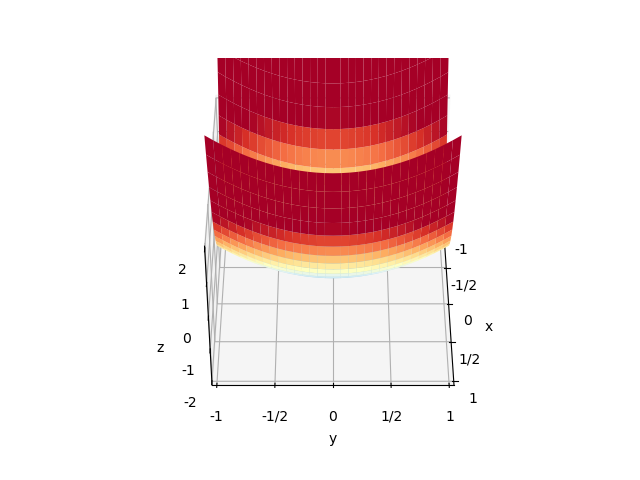

In [8]:
# Ordinary Linear
# Ridge
# Logistic

def least_squares(w,X,y):
    x = X[


# Define minima_surface

def minima_surface(x,y,a=1,b=1):
    return a*x**2+b*y**2-1

def grad_minima_surface(params,a=1,b=1):
    x=params[0]
    y=params[1]
    grad_x= 2*a*x
    grad_y= 2*b*y
    return np.array([grad_x,grad_y])

def contour_minima_surface(a=1,b=1):
    x, y = np.meshgrid(np.arange(-4.5, 4.5, 0.2), np.arange(-4.5, 4.5, 0.2))
    fig, ax = plt.subplots(figsize=(10, 6))
    z=np.abs(minima_surface(x,y,a,b))
    cax = ax.contour(x, y, z, levels=np.logspace(0.0, 5, 35), norm=LogNorm(), cmap="RdYlBu_r")
    ax.plot(0,0, 'r*', markersize=18)

    ax.set_xlabel('$x$')
    ax.set_ylabel('$y$')

    return fig,ax

def beales_function(x,y):
    return np.square(1.5-x+x*y)+np.square(2.25-x+x*y*y)+np.square(2.625-x+x*y**3)
    return f

def grad_beales_function(params):
    x=params[0]
    y=params[1]
    grad_x=2*(1.5-x+x*y)*(-1+y)+2*(2.25-x+x*y**2)*(-1+y**2)+2*(2.625-x+x*y**3)*(-1+y**3)
    grad_y=2*(1.5-x+x*y)*x+4*(2.25-x+x*y**2)*x*y+6*(2.625-x+x*y**3)*x*y**2
    return [grad_x,grad_y]

def contour_beales_function():
    #plot beales function
    x, y = np.meshgrid(np.arange(-4.5, 4.5, 0.2), np.arange(-4.5, 4.5, 0.2))
    fig, ax = plt.subplots(figsize=(10, 6))
    z=beales_function(x,y)
    cax = ax.contour(x, y, z, levels=np.logspace(0, 5, 35), norm=LogNorm(), cmap="RdYlBu_r")
    ax.plot(3,0.5, 'r*', markersize=18)

    ax.set_xlabel('$x$')
    ax.set_ylabel('$y$')

    ax.set_xlim((-4.5, 4.5))
    ax.set_ylim((-4.5, 4.5))
    
    return fig,ax
    
#Make plots of surfaces
plt.close('all') # closes previous plots
x, y = np.mgrid[-1:1:31j, -1:1:31j]
fig1,ax1=plot_surface(x,y,monkey_saddle(x,y))
fig2,ax2=plot_surface(x,y,saddle_surface(x,y))
fig3,ax3=plot_surface(x,y,minima_surface(x,y,5),0)

#Contour plot of Beale's Function

fig4,ax4 =contour_beales_function()
plt.show()

fig5,ax5 = contour_minima_surface(1,1)
plt.show()

In [41]:
# GD
# GDM
# NAG
# SGD
# ADAM
# RMSPROP



# Analytic gradient descent algorithm.
# grad: Method that represents derivative of some function. 
def gd(grad, start, end, n=1000, eta=10**-4):
    path = np.zeros((n+1, len(start)))
    path[0] = start
    j = 1
    converged = np.allclose(path[j-1], end, atol=10**-2)
    while j < n and not converged: 
        path[j] = path[j-1] - eta * grad(path[j-1])
        j += 1
        converged = np.allclose(path[j-1], end, atol=10**-2)
    if converged: return path,j-1
    return path,n


# Gradient descent algorithm with finite difference derivatives.
# def gd(f, start, n=1000, eta=10**-4):

# Analytic gradient descent with momentum.
def gdm(grad, start, n=1000, eta=10**-4, gamma=0.9):
    path = np.empty((n+1, len(start)))
    path[0] = start
    j = 1
    converged = np.allclose(path[j-1], end, atol=10**-2)
    
    dw = eta * grad(path[0])
    path[1] = path[0] - dw
    for j in range(2,n+1):
        dw = eta * grad(path[j-1]) + gamma * dw
        path[j] = path[j-1] - dw
    return path




def NAG(grad, init, n_epochs=5000, eta=10**-4, gamma=0.9,noise_strength=0):
    params=np.array(init)
    param_traj=np.zeros([n_epochs+1,2])
    param_traj[0,]=init
    v=0
    for j in range(n_epochs):
        noise=noise_strength*np.random.randn(params.size)
        params_nesterov=params-gamma*v
        v=gamma*v+eta*(np.array(grad(params_nesterov))+noise)
        params=params-v
        param_traj[j+1,]=params
    return param_traj

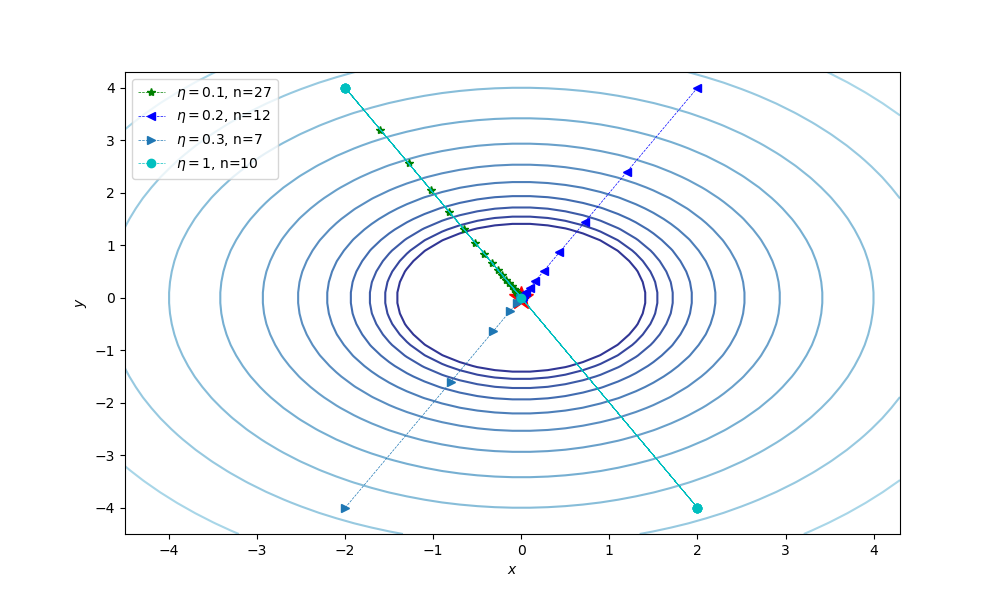

In [85]:
plt.close('all')

fig,ax = contour_minima_surface()

init1=[-2,4]
init2=[2,4]
init3=[-2,-4]
init4=[2,-4]

target = [0,0]

eta1=0.1
eta2=0.2
eta3=0.3
eta4=1

gd_1,n_1=gd(grad_minima_surface, init1, target, n=100, eta=eta1)
gd_2,n_2=gd(grad_minima_surface, init2, target, n=100, eta=eta2)
gd_3,n_3=gd(grad_minima_surface, init3, target, n=100, eta=eta3)
gd_4,n_4=gd(grad_minima_surface, init4, target, n=10, eta=eta4)

overlay_trajectory_contour(ax,gd_1,f'$\\eta=${eta1}, n={n_1}','g--*', lw=0.5)
overlay_trajectory_contour(ax,gd_2,f'$\\eta=${eta2}, n={n_2}','b--<', lw=0.5)
overlay_trajectory_contour(ax,gd_3,f'$\\eta=${eta3}, n={n_3}','-->', lw=0.5)
overlay_trajectory_contour(ax,gd_4,f'$\\eta=${eta4}, n={n_4}','c--o', lw=0.5)
plt.legend(loc=2)
plt.show()